# Markdown基础语法
参考：
[markdown基础语法](https://www.jianshu.com/p/191d1e21f7ed)

# PILLOW 图像基本操作

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 图像的读取与显示,与存储(Pillow)

In [2]:
#读取图像，请注意相对路径与绝对路径的关系
img = Image.open("../img/lena.jpg")

In [3]:
#图像相关信息
print(img.format,img.size,img.mode)

JPEG (512, 512) RGB


In [4]:
#用系统默认图片查看器查看图像
img.show()

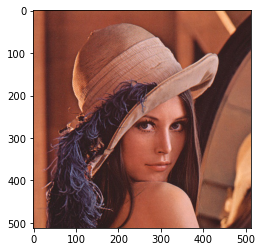

In [5]:
#inline方式查看图像-方案1
plt.imshow(img)

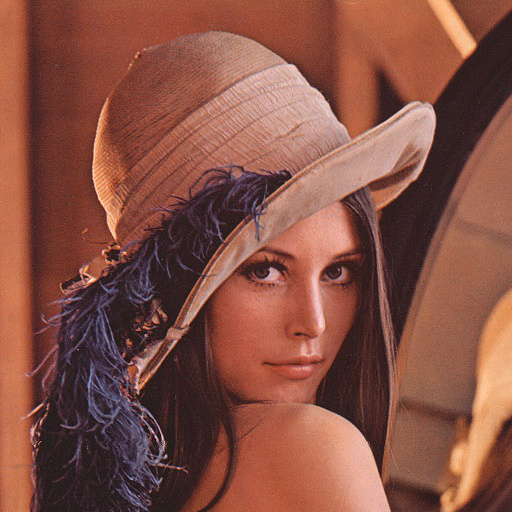

In [9]:
#inline方式查看图像-方案2
img

In [41]:
#存储图像
img.save("../img/lena2.jpg")

## 图像基础操作

### 创建新图像
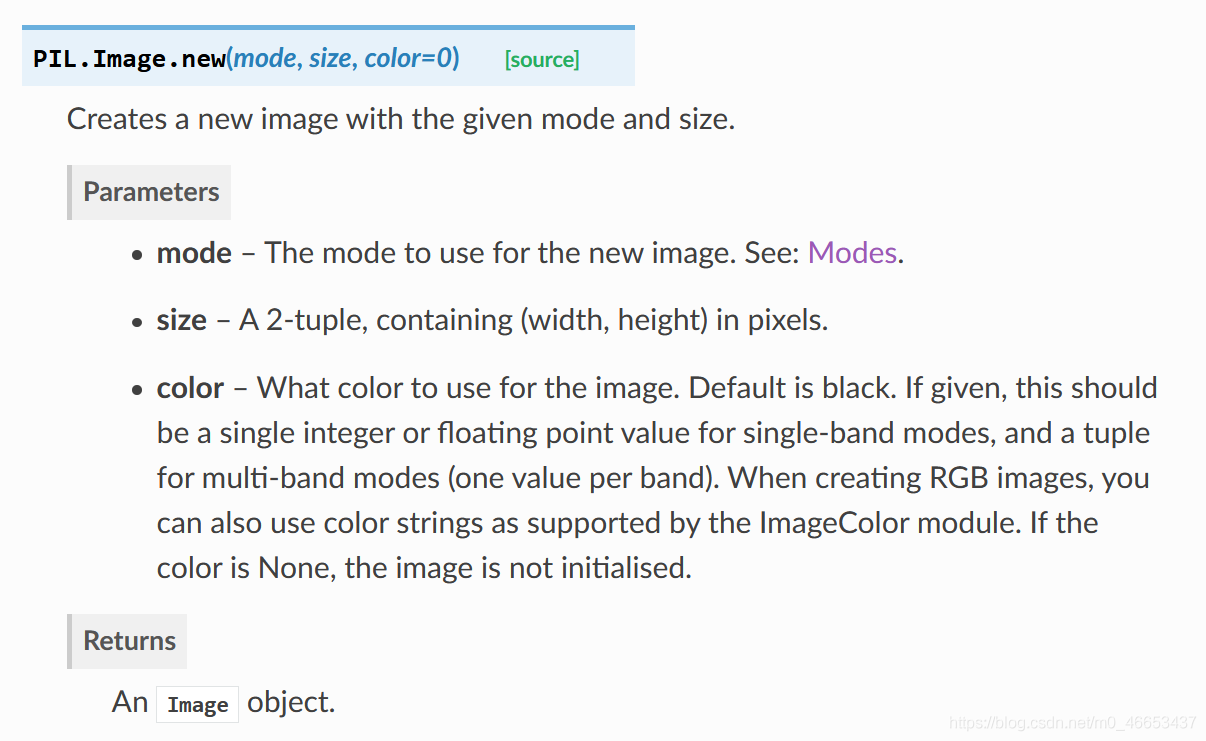

In [6]:
#这两行代码等效,生成一个红色图片
img_new = Image.new("RGB",(256,256),(255,0,0))
img_new = Image.new("RGB",(256,256),"red")

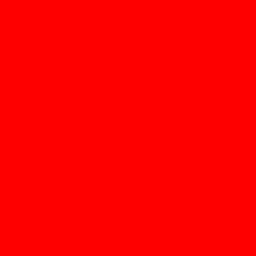

In [8]:
img_new

### 图像基本几何操作

创建原图像的转置图像

In [10]:
img_np = np.array(img)
w,h,c = img_np.shape
img_trans_np = np.zeros((h,w,c)).astype("uint8")

In [11]:
#采用矩阵方法转置
for ih in range(h):
    for iw in range(w):
            img_trans_np [ih,iw] = img_np[iw,ih]

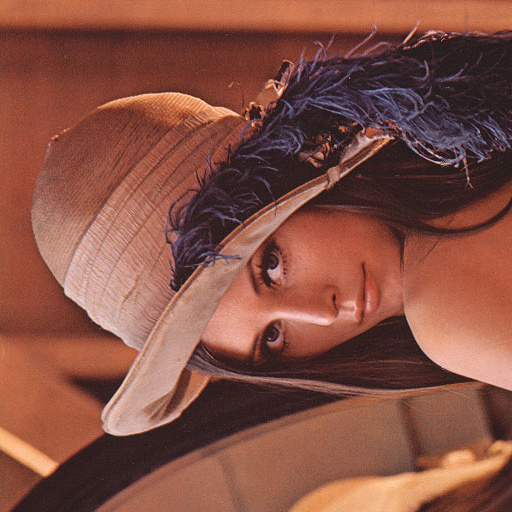

In [12]:
img_trans_PIL = Image.fromarray(img_trans_np)
img_trans_PIL

图像翻转，折叠

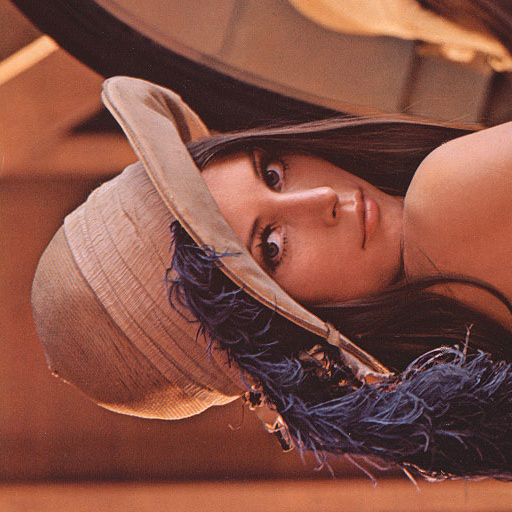

In [14]:
#旋转
trans = img.transpose(Image.ROTATE_90) #ROTATE_180等等
trans

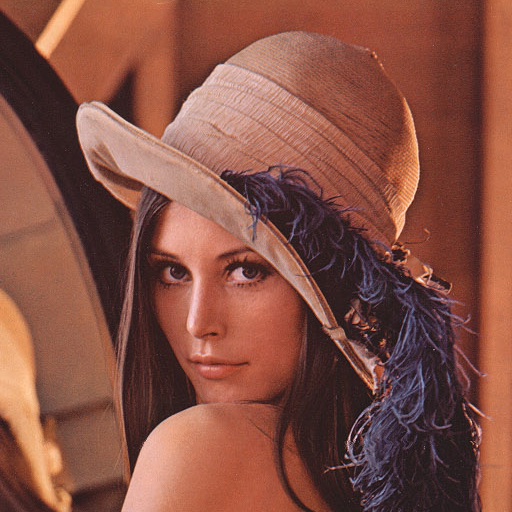

In [15]:
#镜像
flip = img.transpose(Image.FLIP_LEFT_RIGHT) #FLIP_TOP_BOTTOM等
flip

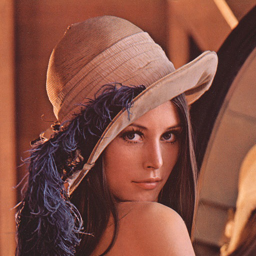

In [16]:
#缩放
rz = img.resize((256,256))
rz

### 图像基本通道操作

通道融合（假彩色）

In [49]:
r,g,b = img.split()

In [50]:
img_bgr = Image.merge("RGB",(b,g,r))
img_bgr.show()

转换为灰度图

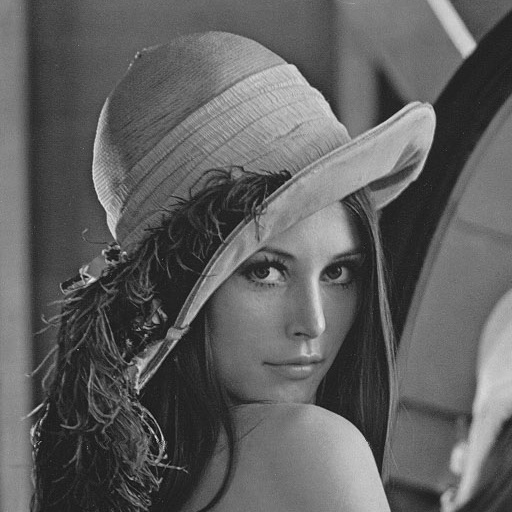

In [17]:
#采用自带函数
gray1 = img.convert("L")
gray1

In [19]:
#矩阵方法
gray2 = np.zeros((h,w)).astype("uint8")
for ih in range(h):
    for iw in range(w):
        gray2[ih,iw]= 0.2989 * img_np[ih,iw,0]+0.5870*img_np[ih,iw,1]+0.1140*img_np[ih,iw,2] #常用系数
gray2 = Image.fromarray(gray2)
gray2.show()

### 图像像素基本操作

反相变换

In [183]:
img_gray = img.convert("L")
img_gray_np = np.array(img_gray) #读入数组

In [184]:
img_neg = 255-img_gray_np

In [185]:
img_neg = Image.fromarray(img_neg)
img_neg.show()

对图像像素直接操作

In [20]:
#将图像左上角变为黄色方块
img_np2 = np.zeros((h,w,c)).astype("uint8")
for ih in range(h):
    for iw in range(w):
        if ih< 100 and iw <100:
            img_np2[ih,iw] = [255,255,0]
        else:
            img_np2[ih,iw] = img_np[ih,iw]

In [21]:
out = Image.fromarray(img_np2)
out.show()

# Opencv 相关注意事项

In [27]:
import cv2
import matplotlib.pyplot as plt

与PIL库不同的是，opencv不具备在jupyter内直接显示的功能，如果采用cv2.imshow()，会造成python kernel崩溃。  
因此，我们需要借助matplotlib来显示opencv读取和处理的图像，在此之前，我们需要进行一些工作,即定义自己的图像显示函数，但是要注意，opencv的颜色通道是BGR，我们要转为RGB再显示

In [31]:
#三通道图像的显示
def my_imshow(img):
    im = img[:,:,::-1] #将BGR以RGB显示
    plt.imshow(im)

In [32]:
img1 = cv2.imread("../img/lena.jpg")
#请注意绝对路径与相对路径的区别

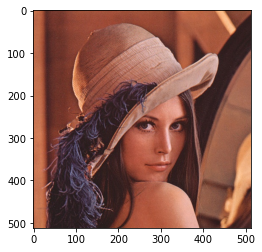

In [33]:
my_imshow(img1)

In [34]:
cv2.imwrite("../img/lena3.jpg",img1)

True

opencv直接与numpy 兼容，所以它读进去就是一个矩阵/数组，你对矩阵的所有操作最后都可以放在opencv上

In [35]:
type(img1)

numpy.ndarray

In [36]:
#opencv对中文路径会有一些问题，所以请在使用opencv前自定读取图像函数，如下：
def cv_imread(file_path):
    img = cv2.imdecode(np.fromfile(file_path,dtype = "uint8"),-1)
    return img

In [37]:
img = cv2.imread(r"E:\本科生课件\课件\课件2021-李荣昊\img\lena.bmp")

In [40]:
img.shape
#可以看到，opencv自带图像读取函数读取中文路径时会出错

AttributeError: 'NoneType' object has no attribute 'shape'

In [41]:
img = cv_imread("E:\本科生课件\课件\课件2021-李荣昊\img\lena.bmp")

In [43]:
img.shape
#这样就可以了

(512, 512, 3)